In [91]:
##1.Data Cleaning:

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Load the dataset
dfs = pd.read_excel(r"C:\Users\yuvas\Downloads\Instagram_Dataset.xlsx", sheet_name=None)

In [97]:
print(dfs.keys())

dict_keys(['Instagram Profile Overview', 'Instagram Post Engagement', 'Instagram Age Gender Demographi', 'Instagram Top Cities Regions', 'SupermetricsQueries'])


In [99]:
last_sheet = list(dfs.keys())[-1]  # Get the name of the last sheet
dfs.pop(last_sheet) 

,Supermetrics_Queries,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_40,column_41,column_42,column_43,column_44,column_45,column_46,column_47,column_48,RowHash
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5acbd8048d53d1aa8fcbaacb57506e7eb6a1f570d93c89...
1,All the queries created by Supermetrics are st...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,efee96c732d037c319d3f73c81b12b0dc9aa33a84cbd06...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17409608,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5596902c3dd3e376bfabc7e8f3f6093bda2cab5c0ef284...
3,On this sheet you can:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7127462e960991cb8aedf1b1b2d95635d7e5cbc156c627...
4,1. Modify the parameters of a query. Any chang...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46ec689d0805babc0018ef9d46146d14a32f0123468592...
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5acbd8048d53d1aa8fcbaacb57506e7eb6a1f570d93c89...
6,2. Remove a query by deleting its row,NaN,NaN,NaN,NaN,NaN,NaN,Europe/London,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,458e1b9a130915b3b90d891f724ddac49b1c7988fb870a...
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5acbd8048d53d1aa8fcbaacb57506e7eb6a1f570d93c89...
8,3. Add new queries: type a range address and q...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16dacdf47f54322da67967b592b2ce607344d6d4a694a2...
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5acbd8048d53d1aa8fcbaacb57506e7eb6a1f570d93c89...


In [101]:
print(f"Remaining Sheets: {list(dfs.keys())}")

Remaining Sheets: ['Instagram Profile Overview', 'Instagram Post Engagement', 'Instagram Age Gender Demographi', 'Instagram Top Cities Regions']


In [103]:
# Select a specific sheet
df1 = dfs["Instagram Profile Overview"] 
df2 = dfs["Instagram Post Engagement"] 
df3 = dfs["Instagram Age Gender Demographi"] 
df4 = dfs["Instagram Top Cities Regions"]

In [105]:
df1.isnull().sum()

Date                     0
Profile impressions      0
Shares                   0
Engagement               0
Profile visits           0
Profile reach            0
Reel shares              0
New followers          340
RowHash                  6
dtype: int64

In [107]:
df2.isnull().sum()

Date                  0
Media ID              0
Media caption         0
Media product type    0
Media impressions     0
Media reach           0
Like count            0
Comments count        0
Shares                0
Unique saves          0
Video views           0
RowHash               0
dtype: int64

In [109]:
df3.isnull().sum()

Gender               0
Age                  0
Profile followers    0
RowHash              0
dtype: int64

In [111]:
df4.isnull().sum()

City                 0
Area & city          0
Area                 0
Profile followers    0
RowHash              0
dtype: int64

In [113]:
# Fill missing values with 0
df1.fillna(0, inplace=True)

In [115]:
df1.isnull().sum() #After filling missing values 

Date                   0
Profile impressions    0
Shares                 0
Engagement             0
Profile visits         0
Profile reach          0
Reel shares            0
New followers          0
RowHash                0
dtype: int64

In [117]:
print(df2.columns)

Index(['Date', 'Media ID', 'Media caption', 'Media product type',
       'Media impressions', 'Media reach', 'Like count', 'Comments count',
       'Shares', 'Unique saves', 'Video views', 'RowHash'],
      dtype='object')


In [119]:
print(df1.columns)

Index(['Date', 'Profile impressions', 'Shares', 'Engagement', 'Profile visits',
       'Profile reach', 'Reel shares', 'New followers', 'RowHash'],
      dtype='object')


In [121]:
##2.Basic Analysis:

In [123]:
# Calculate Engagement Rate by Impressions (ERI)
df2["Total Engagement"] = df2["Like count"] + df2["Comments count"] + df2["Shares"] + df2["Unique saves"]


In [125]:
# Calculate Engagement Rate by Reach (ERR)
df2["Engagement_Rate_Reach"] = (df2["Total Engagement"] / df2["Media reach"]) * 100


In [127]:
# Calculate Engagement Rate by Impressions (ERI)
df2["Engagement_Rate_Impressions"] = (df2["Total Engagement"] / df2["Media impressions"]) * 100

# Replace inf values with 0 (Avoid chained assignment)
df2["Engagement_Rate_Impressions"] = df2["Engagement_Rate_Impressions"].replace([np.inf, -np.inf], 0)

In [129]:
# Computation the average engagement rates
average_err = df2["Engagement_Rate_Reach"].mean()
average_eri = df2["Engagement_Rate_Impressions"].mean()

print(f"Average Engagement Rate (by Reach): {average_err:.2f}%")
print(f"Average Engagement Rate (by Impressions): {average_eri:.2f}%")

Average Engagement Rate (by Reach): 5.50%
Average Engagement Rate (by Impressions): 3.14%


In [131]:
print(df2.columns)

Index(['Date', 'Media ID', 'Media caption', 'Media product type',
       'Media impressions', 'Media reach', 'Like count', 'Comments count',
       'Shares', 'Unique saves', 'Video views', 'RowHash', 'Total Engagement',
       'Engagement_Rate_Reach', 'Engagement_Rate_Impressions'],
      dtype='object')


In [133]:
# Finding the top-performing post
top_post = df2.loc[df2["Total Engagement"].idxmax()]

In [135]:
print("Top-Performing Post Based on Engagement:")
print(top_post[["Date", "Media ID", "Media caption", "Total Engagement"]])

Top-Performing Post Based on Engagement:
Date                                              2024-11-16 00:00:00
Media ID                                            18077447254583656
Media caption       8 reminders you need to hear today as a divorc...
Total Engagement                                                  667
Name: 28, dtype: object


In [137]:
##3.Visualization:

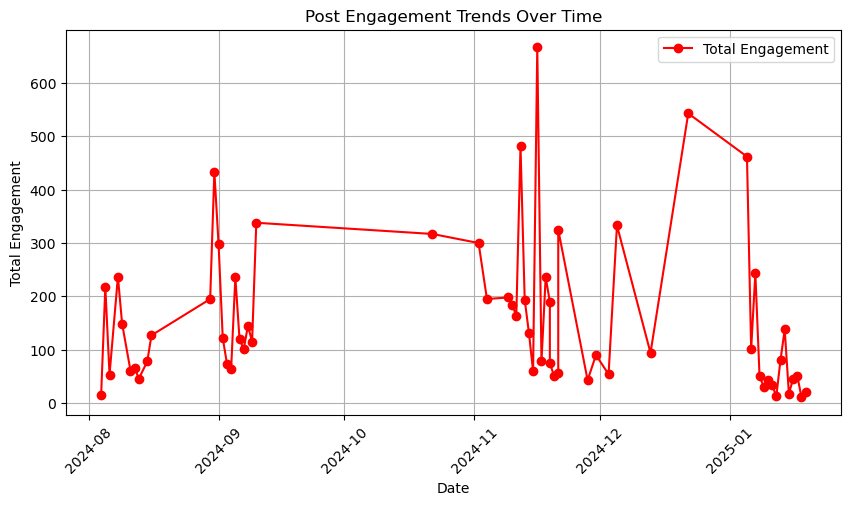

In [139]:
# Ploting the line chart
plt.figure(figsize=(10, 5))
plt.plot(df2["Date"], df2["Total Engagement"], marker="o", linestyle="-", color="red", label="Total Engagement")
# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Total Engagement")
plt.title("Post Engagement Trends Over Time")
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [141]:
df2["Media product type"].unique()

array(['FEED', 'REELS'], dtype=object)

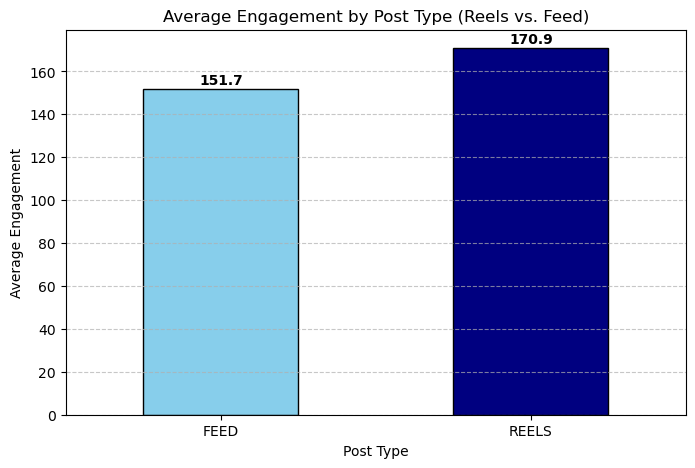

In [143]:
# Group by post type and calculate average engagement
engagement_by_type = df2.groupby("Media product type")["Total Engagement"].mean()
# Plot the bar chart
plt.figure(figsize=(8, 5))
bars=engagement_by_type.plot(kind="bar", color=["skyblue", "Navy"], edgecolor="black")
# Add data point labels on top of bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
             bar.get_height() + 1,               # Y position (slightly above the bar)
             f'{bar.get_height():.1f}',          # Value with 1 decimal place
             ha='center', va='bottom', fontsize=10, fontweight="bold", color="black")

# Formatting the chart
plt.xlabel("Post Type")
plt.ylabel("Average Engagement")
plt.title("Average Engagement by Post Type (Reels vs. Feed)")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

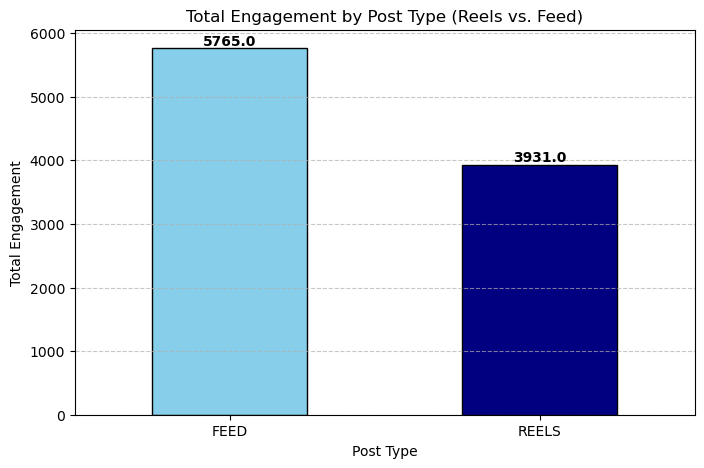

In [145]:
# Group by post type and calculate average engagement
engagement_by_type = df2.groupby("Media product type")["Total Engagement"].sum()
# Plot the bar chart
plt.figure(figsize=(8, 5))
bars=engagement_by_type.plot(kind="bar", color=["skyblue", "Navy"], edgecolor="black")
# Add data point labels on top of bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
             bar.get_height() + 1,               # Y position (slightly above the bar)
             f'{bar.get_height():.1f}',          # Value with 1 decimal place
             ha='center', va='bottom', fontsize=10, fontweight="bold", color="black")

# Formatting the chart
plt.xlabel("Post Type")
plt.ylabel("Total Engagement")
plt.title("Total Engagement by Post Type (Reels vs. Feed)")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [147]:
##4. Bonus Task

In [149]:
def predict_post_performance(df2, new_post_engagement, threshold_factor=1.2):
    "Predicts whether a post will perform well based on previous engagement data."
    # Calculate average engagement from past posts
    average_engagement = df2["Total Engagement"].mean()
    # Define the threshold (e.g., 20% above average)
    performance_threshold = average_engagement * threshold_factor
    # Predict performance
    if new_post_engagement > performance_threshold:
        return "High-performing post!"
    else:
        return "Low-performing post."
# Predict performance for a new post with 1500 engagements
new_post_engagement = 1500
result = predict_post_performance(df2, new_post_engagement)

print(f"Prediction for new post: {result}")

Prediction for new post: High-performing post!


In [151]:
with pd.ExcelWriter(r"C:\Users\yuvas\Downloads\Cleaned_Insta_Data.xlsx") as writer:
    for sheet_name, df in dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)